In [136]:
# Libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

from sklearn import tree
from sklearn.metrics import RocCurveDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Show current working directory
print(os.getcwd())

# Show version of scikit-learn
import sklearn
sklearn.__version__

/workspaces/data_analytics/Week_09_KK


'1.3.0'

### Import supermarket data

In [137]:
usecols = ["id", "bfs_name", "bfs_number", "lat", "lon", "brand", "pop", "pop_dens", "frg_pct", "emp"]

df_supermarkets = pd.read_csv('supermarkets_data_enriched.csv', sep=",", encoding="utf-8", usecols=usecols)

df_supermarkets.head()

,id,lat,lon,brand,bfs_name,bfs_number,pop,pop_dens,frg_pct,emp
0,33126515,47.155616,9.037915,Spar,Schänis,3315,3876,97.142857,13.054696,1408.0
1,280130028,47.155492,9.039666,ALDI,Schänis,3315,3876,97.142857,13.054696,1408.0
2,6122906632,47.158959,9.044477,Denner,Schänis,3315,3876,97.142857,13.054696,1408.0
3,9019298862,47.155185,9.038472,Lidl,Schänis,3315,3876,97.142857,13.054696,1408.0
4,36726161,47.226191,8.980329,Migros,Uznach,3339,6489,860.610080,27.862537,3500.0


### Remove missing values

In [138]:
df_supermarkets = df_supermarkets.dropna()

df_supermarkets.head()

,id,lat,lon,brand,bfs_name,bfs_number,pop,pop_dens,frg_pct,emp
0,33126515,47.155616,9.037915,Spar,Schänis,3315,3876,97.142857,13.054696,1408.0
1,280130028,47.155492,9.039666,ALDI,Schänis,3315,3876,97.142857,13.054696,1408.0
2,6122906632,47.158959,9.044477,Denner,Schänis,3315,3876,97.142857,13.054696,1408.0
3,9019298862,47.155185,9.038472,Lidl,Schänis,3315,3876,97.142857,13.054696,1408.0
4,36726161,47.226191,8.980329,Migros,Uznach,3339,6489,860.610080,27.862537,3500.0


### Create subset

In [139]:
df_sub = df_supermarkets.loc[df_supermarkets['brand'].isin(['Migros', 'Volg'])]

df_sub.head()

,id,lat,lon,brand,bfs_name,bfs_number,pop,pop_dens,frg_pct,emp
4,36726161,47.226191,8.980329,Migros,Uznach,3339,6489,860.610080,27.862537,3500.0
8,48932835,47.375020,8.522895,Migros,Zürich,261,420217,4778.994655,32.458468,491193.0
11,83330862,47.344749,8.529981,Migros,Zürich,261,420217,4778.994655,32.458468,491193.0
12,119249170,47.375255,8.536107,Migros,Zürich,261,420217,4778.994655,32.458468,491193.0
15,262400822,47.364072,8.530945,Migros,Zürich,261,420217,4778.994655,32.458468,491193.0


## 2) b)

### Create train/test samples

In [140]:
# Create train and test samples
X_train, X_test, y_train, y_test = train_test_split(df_supermarkets[['pop',
                                                            'pop_dens',
                                                            'frg_pct',
                                                            'emp']], 
                                                                df_supermarkets['brand'], 
                                                                test_size=0.2, 
                                                                random_state=42)

# Show X_train
print('X_train:')
print(X_train.head(), '\n')

# Show y_train
print('y_train:')
print(y_train.head())

X_train:
         pop     pop_dens    frg_pct       emp
338   173232  7263.396226  37.955459  185432.0
1499   21773  1764.424635  20.938777   34888.0
1011   18540  1268.125855  35.571737   11126.0
551    15763   625.515873  22.483030   10023.0
2198    4498   680.484115  21.076034    1572.0 

y_train:
338     Migros
1499    Denner
1011      Coop
551       Coop
2198    Migros
Name: brand, dtype: object


### Fit random forest classifier / make predictions

In [141]:
# Initialize the classification tree model 
rlf = DecisionTreeClassifier(random_state=20, 
                             max_depth=3)

# Train the classification tree model 
rlf = rlf.fit(X_train, y_train)

# Make model predictions
y_pred = rlf.predict(X2_test)
y_pred

array(['Migros', 'Migros', 'Migros', 'Coop', 'Volg', 'Coop', 'Migros',
       'Migros', 'Volg', 'Coop', 'Volg', 'Migros', 'Migros', 'Migros',
       'Coop', 'Volg', 'Volg', 'Coop', 'Volg', 'Coop', 'Volg', 'Migros',
       'Volg', 'Migros', 'Migros', 'Volg', 'Coop', 'Coop', 'Volg',
       'Migros', 'Coop', 'Volg', 'Coop', 'Migros', 'Migros', 'Migros',
       'Coop', 'Migros', 'Migros', 'Coop', 'Migros', 'Migros', 'Volg',
       'Volg', 'Volg', 'Migros', 'Volg', 'Migros', 'Migros', 'Migros',
       'Migros', 'Migros', 'Migros', 'Coop', 'Coop', 'Migros', 'Volg',
       'Migros', 'Coop', 'Volg', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Volg', 'Migros', 'Coop', 'Migros', 'Migros', 'Migros',
       'Coop', 'Volg', 'Migros', 'Migros', 'Volg', 'Migros', 'Coop',
       'Coop', 'Migros', 'Volg', 'Coop', 'Volg', 'Migros', 'Coop',
       'Migros', 'Coop', 'Migros', 'Coop', 'Migros', 'Coop', 'Volg',
       'Migros', 'Migros', 'Migros', 'Coop', 'Migros', 'Coop', 'Migros',
       'Mi

### Text representation of classification tree and visualization

In [142]:
# Text representation of the classification tree
text_rep = tree.export_text(rlf, 
                            feature_names=list(X_train.columns))

# Print text_representation
print(text_rep)

|--- pop <= 3099.50
|   |--- emp <= 574.00
|   |   |--- frg_pct <= 10.95
|   |   |   |--- class: Volg
|   |   |--- frg_pct >  10.95
|   |   |   |--- class: Volg
|   |--- emp >  574.00
|   |   |--- frg_pct <= 23.27
|   |   |   |--- class: Volg
|   |   |--- frg_pct >  23.27
|   |   |   |--- class: Coop
|--- pop >  3099.50
|   |--- pop <= 5137.00
|   |   |--- pop_dens <= 1975.23
|   |   |   |--- class: Coop
|   |   |--- pop_dens >  1975.23
|   |   |   |--- class: Migros
|   |--- pop >  5137.00
|   |   |--- pop <= 123882.00
|   |   |   |--- class: Migros
|   |   |--- pop >  123882.00
|   |   |   |--- class: Coop



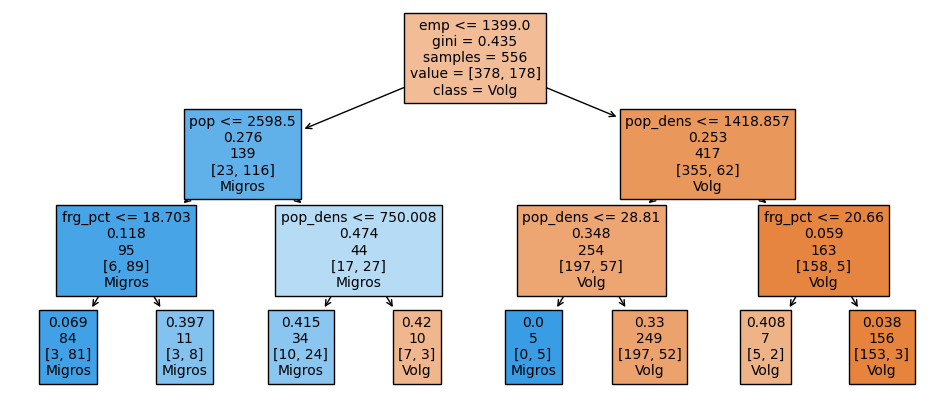

In [143]:
# For the meaning of numbers in boxes see root node
fig = plt.figure(figsize=(12,5))
tree_plot = tree.plot_tree(clf, 
                   feature_names=list(X2_train.columns),  
                   class_names=['Volg', 'Migros'],
                   filled=True,
                   fontsize=10,
                   label='root')

### Confusion matrix and classification report

In [144]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y2_test, y_pred), '\n')

# Classification report
print('Classification report')
print(classification_report(y2_test, y_pred))

Confusion matrix
[[ 0  0  0]
 [31 71  6]
 [ 5  4 23]] 

Classification report
              precision    recall  f1-score   support

        Coop       0.00      0.00      0.00         0
      Migros       0.95      0.66      0.78       108
        Volg       0.79      0.72      0.75        32

    accuracy                           0.67       140
   macro avg       0.58      0.46      0.51       140
weighted avg       0.91      0.67      0.77       140



### ROC curve and AUC

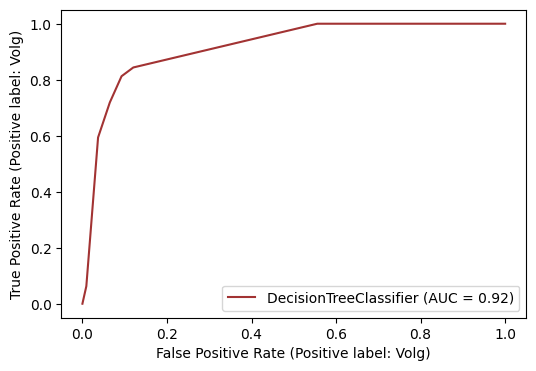

In [145]:
# Plot ROC curve and calculate AUC
plt.figure(figsize=(6,4))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(clf, 
                                          X2_test, 
                                          y2_test, 
                                          ax=ax,
                                          alpha=0.8,
                                          c="darkred")
plt.show()

## 2) c)

### Create train/test samples

In [146]:
# Create train and test samples
X2_train, X2_test, y2_train, y2_test = train_test_split(df_sub[['pop',
                                                            'pop_dens',
                                                            'frg_pct',
                                                            'emp']], 
                                                                df_sub['brand'], 
                                                                test_size=0.20, 
                                                                random_state=42)

# Show X_train
print('X2_train:')
print(X2_train.head(), '\n')

# Show y_train
print('y2_train:')
print(y2_train.head())

X2_train:
         pop      pop_dens    frg_pct       emp
427     1728     17.891903   8.217593     725.0
271   173232   7263.396226  37.955459  185432.0
1149  203951  12810.992462  47.954656  186620.0
2655    4757     35.638298  16.312802    3229.0
2369    6872   4521.052632  26.062282    3185.0 

y2_train:
427       Volg
271     Migros
1149    Migros
2655    Migros
2369    Migros
Name: brand, dtype: object


### Fit random forest classifier / make predictions

In [147]:
# Initialize the classification tree model 
clf = DecisionTreeClassifier(random_state=20, 
                             max_depth=3)

# Train the classification tree model 
clf = clf.fit(X2_train, y2_train)

# Make model predictions
y_pred = clf.predict(X2_test)
y_pred

array(['Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Migros', 'Volg', 'Migros', 'Volg', 'Migros', 'Migros',
       'Migros', 'Migros', 'Volg', 'Volg', 'Volg', 'Volg', 'Volg', 'Volg',
       'Migros', 'Volg', 'Migros', 'Migros', 'Volg', 'Volg', 'Migros',
       'Volg', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros', 'Migros',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Volg', 'Volg', 'Volg', 'Migros', 'Volg', 'Migros',
       'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Migros', 'Volg', 'Migros', 'Volg', 'Volg', 'Migros',
       'Migros', 'Migros', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros',
       'Migros', 'Migros', 'Migros', 'Migros', 'Volg', 'Migros', 'Migros',
       'Volg', 'Migros', 'Migros', 'Migros', 'Migros', 'Volg', 'Migros',
       'Volg', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros', 'Migros',
       'Migros', 'Migros', 'Volg', 'Migros', 'Migros', 'Migros', 'Mig

### Text representation of classification tree and visualization

In [148]:
# Text representation of the classification tree
text_rep = tree.export_text(clf, 
                            feature_names=list(X2_train.columns))

# Print text_representation
print(text_rep)

|--- emp <= 1399.00
|   |--- pop <= 2598.50
|   |   |--- frg_pct <= 18.70
|   |   |   |--- class: Volg
|   |   |--- frg_pct >  18.70
|   |   |   |--- class: Volg
|   |--- pop >  2598.50
|   |   |--- pop_dens <= 750.01
|   |   |   |--- class: Volg
|   |   |--- pop_dens >  750.01
|   |   |   |--- class: Migros
|--- emp >  1399.00
|   |--- pop_dens <= 1418.86
|   |   |--- pop_dens <= 28.81
|   |   |   |--- class: Volg
|   |   |--- pop_dens >  28.81
|   |   |   |--- class: Migros
|   |--- pop_dens >  1418.86
|   |   |--- frg_pct <= 20.66
|   |   |   |--- class: Migros
|   |   |--- frg_pct >  20.66
|   |   |   |--- class: Migros



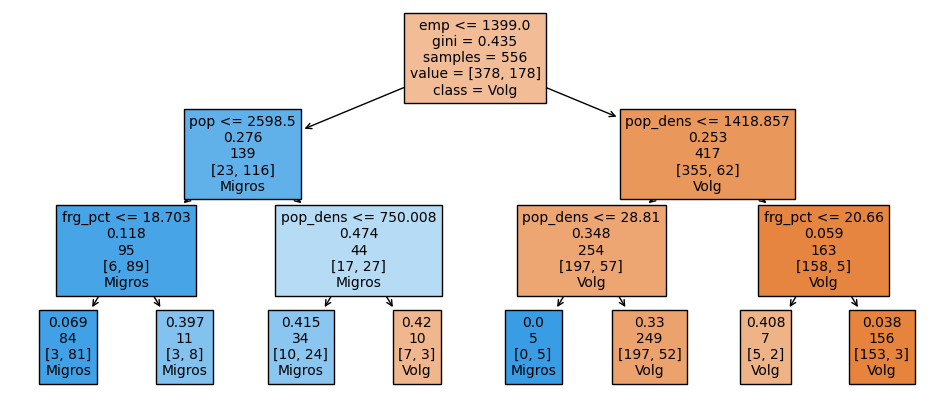

In [149]:
# For the meaning of numbers in boxes see root node
fig = plt.figure(figsize=(12,5))
tree_plot = tree.plot_tree(clf, 
                   feature_names=list(X2_train.columns),  
                   class_names=['Volg', 'Migros'],
                   filled=True,
                   fontsize=10,
                   label='root')

### Confusion matrix and classification report

In [150]:
# Confusion matrix
print('Confusion matrix')
print(confusion_matrix(y2_test, y_pred), '\n')

# Classification report
print('Classification report')
print(classification_report(y2_test, y_pred))

Confusion matrix
[[98 10]
 [ 6 26]] 

Classification report
              precision    recall  f1-score   support

      Migros       0.94      0.91      0.92       108
        Volg       0.72      0.81      0.76        32

    accuracy                           0.89       140
   macro avg       0.83      0.86      0.84       140
weighted avg       0.89      0.89      0.89       140



### ROC curve and AUC

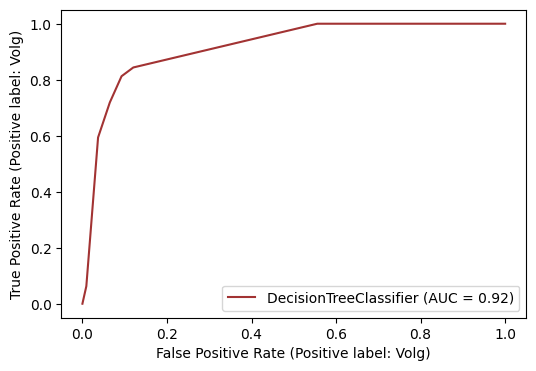

In [151]:
# Plot ROC curve and calculate AUC
plt.figure(figsize=(6,4))
ax = plt.gca()
rfc_disp = RocCurveDisplay.from_estimator(clf, 
                                          X2_test, 
                                          y2_test, 
                                          ax=ax,
                                          alpha=0.8,
                                          c="darkred")
plt.show()

In [152]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
POSIX
Linux | 6.2.0-1015-azure
Datetime: 2023-11-14 10:11:30
Python Version: 3.10.13
-----------------------------------
